In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

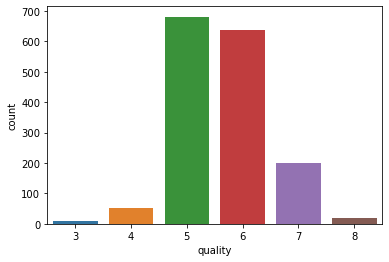

In [7]:
sns.countplot(x='quality', data=df)

<AxesSubplot:>

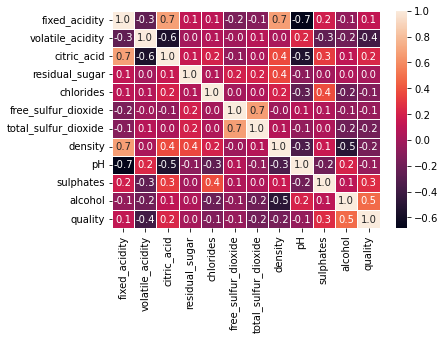

In [8]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.1f')

In [9]:
x = df.iloc[:,0:11].values
y = df.iloc[:,11:].values

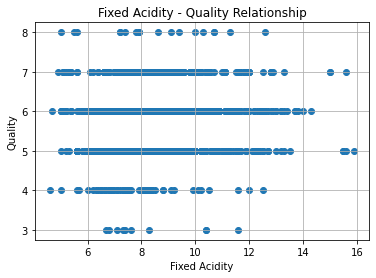

In [10]:
plt.scatter(df.fixed_acidity,df.quality)
plt.xlabel("Fixed Acidity")
plt.ylabel("Quality")
plt.title("Fixed Acidity - Quality Relationship")
plt.grid(True)
plt.show()

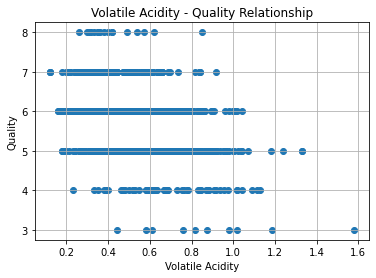

In [11]:
plt.scatter(df.volatile_acidity,df.quality)
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality")
plt.title("Volatile Acidity - Quality Relationship")
plt.grid(True)
plt.show()

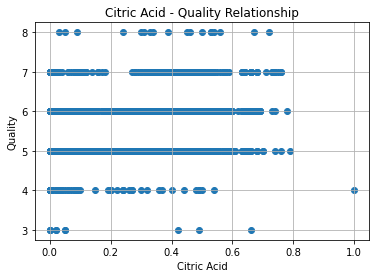

In [12]:
plt.scatter(df.citric_acid,df.quality)
plt.xlabel("Citric Acid")
plt.ylabel("Quality")
plt.title("Citric Acid - Quality Relationship")
plt.grid(True)
plt.show()

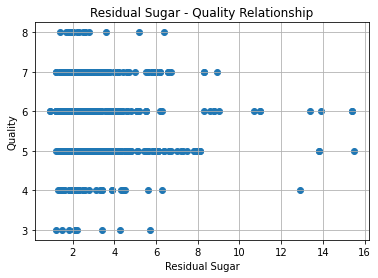

In [13]:
plt.scatter(df.residual_sugar,df.quality)
plt.xlabel("Residual Sugar")
plt.ylabel("Quality")
plt.title("Residual Sugar - Quality Relationship")
plt.grid(True)
plt.show()

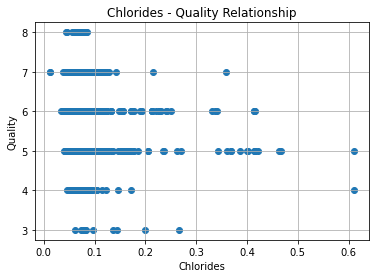

In [14]:
plt.scatter(df.chlorides,df.quality)
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.title("Chlorides - Quality Relationship")
plt.grid(True)
plt.show()

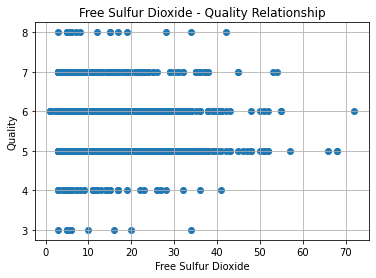

In [15]:
plt.scatter(df.free_sulfur_dioxide,df.quality)
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Quality")
plt.title("Free Sulfur Dioxide - Quality Relationship")
plt.grid(True)
plt.show()

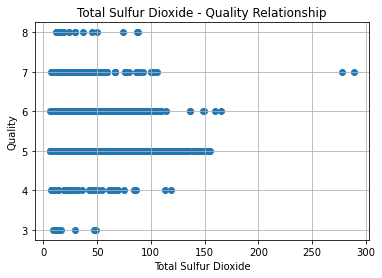

In [16]:
plt.scatter(df.total_sulfur_dioxide,df.quality)
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Quality")
plt.title("Total Sulfur Dioxide - Quality Relationship")
plt.grid(True)
plt.show()

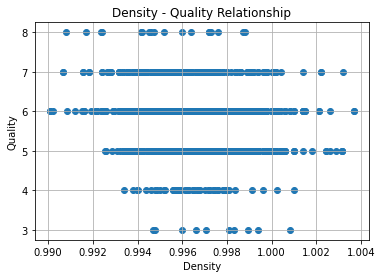

In [17]:
plt.scatter(df.density,df.quality)
plt.xlabel("Density")
plt.ylabel("Quality")
plt.title("Density - Quality Relationship")
plt.grid(True)
plt.show()

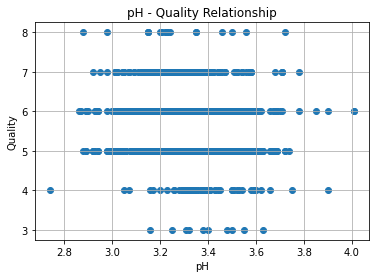

In [18]:
plt.scatter(df.pH,df.quality)
plt.xlabel("pH")
plt.ylabel("Quality")
plt.title("pH - Quality Relationship")
plt.grid(True)
plt.show()

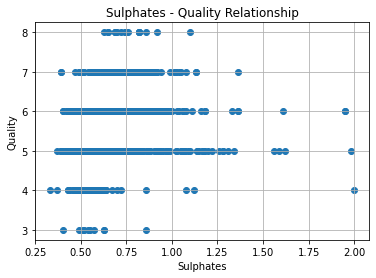

In [19]:
plt.scatter(df.sulphates,df.quality)
plt.xlabel("Sulphates")
plt.ylabel("Quality")
plt.title("Sulphates - Quality Relationship")
plt.grid(True)
plt.show()

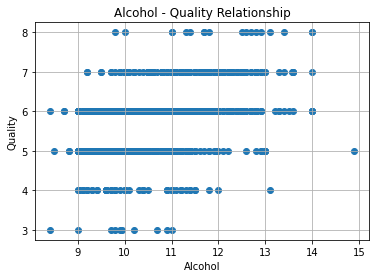

In [20]:
plt.scatter(df.alcohol,df.quality)
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol - Quality Relationship")
plt.grid(True)
plt.show()

In [24]:
mlr = LinearRegression()
mlr.fit(x,y)

LinearRegression()

In [25]:
print('Linear R2 degeri')
print(r2_score(y, mlr.predict(x)))

Linear R2 degeri
0.3605517030386879


In [41]:
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

LinearRegression()

In [42]:
print('Polynomial R2 degeri')
print(r2_score(y, lin_reg.predict(poly_reg.fit_transform(x))))

Polynomial R2 degeri
0.9997742060650046


In [43]:
sc1=StandardScaler()
X = sc1.fit_transform(x)
sc2=StandardScaler()
Y = np.ravel(sc2.fit_transform(y.reshape(-1,1)))

In [45]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X,Y)

SVR()

In [46]:
print('SVR R2 degeri')
print(r2_score(Y, svr_reg.predict(X)))

SVR R2 degeri
0.5281767225760278


In [48]:
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [49]:
print('Decision Tree R2 degeri')
print(r2_score(y, r_dt.predict(x)))

Decision Tree R2 degeri
1.0


In [59]:
rf_reg=RandomForestRegressor(n_estimators = 15,random_state=0)
rf_reg.fit(x,y.ravel())

RandomForestRegressor(n_estimators=15, random_state=0)

In [60]:
print('Random Forest R2 degeri')
print(r2_score(y, rf_reg.predict(x)))

Random Forest R2 degeri
0.9125325197739028
